# California Housing Analysis

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline


Here we define a helper function to plot the scatterplots.

In [19]:
# plots scatterplot relationship between two Series and saves to Images folder
def scatter(ser1, ser2, labels=None, reg=False):
    clrs = ['#4477aa', '#66ccee', '#228833', '#ccbb44', '#ee6677', '#aa3377', '#bbbbbb']

    fig, ax = plt.subplots(figsize=(8, 8))

    index = np.random.randint(7)
    ax.scatter(ser1, ser2, color=clrs[index], edgecolor='k')

    if labels == None:
        labels = [ser1.name, ser2.name]
        
    figtitle = f"{labels[0]} vs. {labels[1]}"

    ax.set_title(figtitle)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])

    if reg == True:
        slope, intercept, rvalue, pvalue, stderr = stats.linregress(ser1, ser2)
        line = ser1 * slope + intercept
        plt.plot(ser1, line, color = 'r')

        summary = {
            "slope" : slope,
            "intercept" : intercept,
            "rvalue" : rvalue,
            "pvalue" : pvalue,
            "stderr" : stderr
        }

    plt.savefig(f"Images/{figtitle}.png")
    plt.show()

    if reg == True:
        return summary


In [5]:
# import csv
housing_df = pd.read_csv("Resources/complete_housing_data.csv")
housing_df = housing_df.drop(columns=["Unnamed: 0", "ocean_proximity"])

housing_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,county_name,total_crime_rate
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Contra Costa,4.776461
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Contra Costa,4.776461
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Alameda,6.625693
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Alameda,6.625693
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Alameda,6.625693
...,...,...,...,...,...,...,...,...,...,...,...
20605,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,Yuba,5.778337
20606,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,Yuba,5.778337
20607,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,Yuba,5.778337
20608,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,Yuba,5.778337


We plot the histograms of the variables of interest.

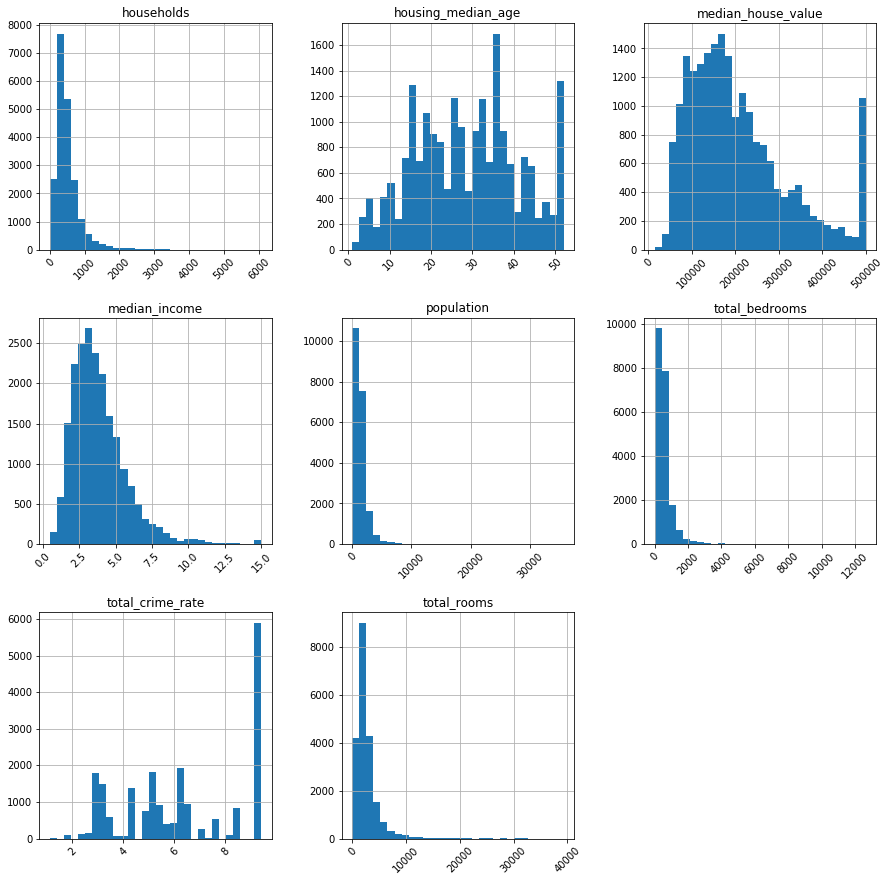

In [6]:
# plot histograms
cols = housing_df.columns.difference(["latitude", "longitude"])
numeric_df = housing_df[cols]

numeric_df.hist(bins=30, figsize=(15,15), xrot=45)
plt.show()


We plot all the points of data colored by their median house value which illustrates the Urban and Rural divide.

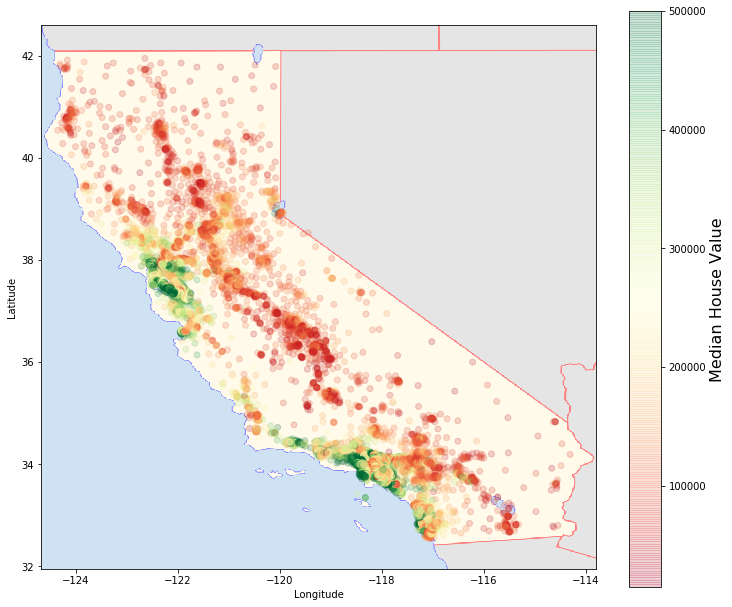

In [6]:
# create fig, axes
fig, ax = plt.subplots(figsize=(15,10))

# force equal aspect ratio
ax.set_aspect('equal')

# get coordinate
lat = housing_df["latitude"]
long = housing_df["longitude"]

# get coloration for house value
coloring = housing_df.median_house_value

# create scatterplot
house_val = ax.scatter(long, lat, c=coloring, cmap='RdYlGn', alpha=0.2)

# create x,y labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# set axes for colorbar
caxes = fig.add_axes([0.80, 0.1, 0.03, 0.8]) 
cbar = fig.colorbar(house_val, cax=caxes, orientation='vertical')
cbar.set_label("Median House Value", fontsize=16)

# set colorbar ticks
prices = housing_df.median_house_value
tick_values = np.linspace(prices.min(), prices.max(), 11)

# overlay outline of California
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = plt.imread("Images/cali_outline.png")
implot = ax.imshow(im, extent=[-124.68, -113.80, 31.95, 42.60], alpha=0.5)

# save image
plt.savefig("Images/cali_house_value.png")

# show plot
plt.show()


Since the number of households can differ between counties, it is more meaningful to look at the distribution of rooms and bedrooms per household. For example since Eureka county has significantly fewer households than Los Angeles county, the total number of rooms or bedrooms is not an appropriate metric.


In [29]:
# group housing data by county
county_rooms = housing_df.groupby("county_name")["total_rooms"].sum()
county_households = housing_df.groupby("county_name")["households"].sum()
county_bedrooms = housing_df.groupby("county_name")["total_bedrooms"].sum()

county_rooms_per_household = county_rooms / county_households
county_bedrooms_per_household = county_bedrooms / county_households

county_median_income = housing_df.groupby("county_name")["median_income"].mean()
county_house_value = housing_df.groupby("county_name")["median_house_value"].mean()
county_crime_rate = housing_df.groupby("county_name")["total_crime_rate"].mean()
county_population = housing_df.groupby("county_name")["population"].sum()
county_house_age = housing_df.groupby("county_name")["housing_median_age"].mean()


Since there is a strong correlation between `Rooms per Household` and `Bedrooms per Household` and one between `Households` and `Population`, we feel comfortable to discard one the pair when looking for relations.
    

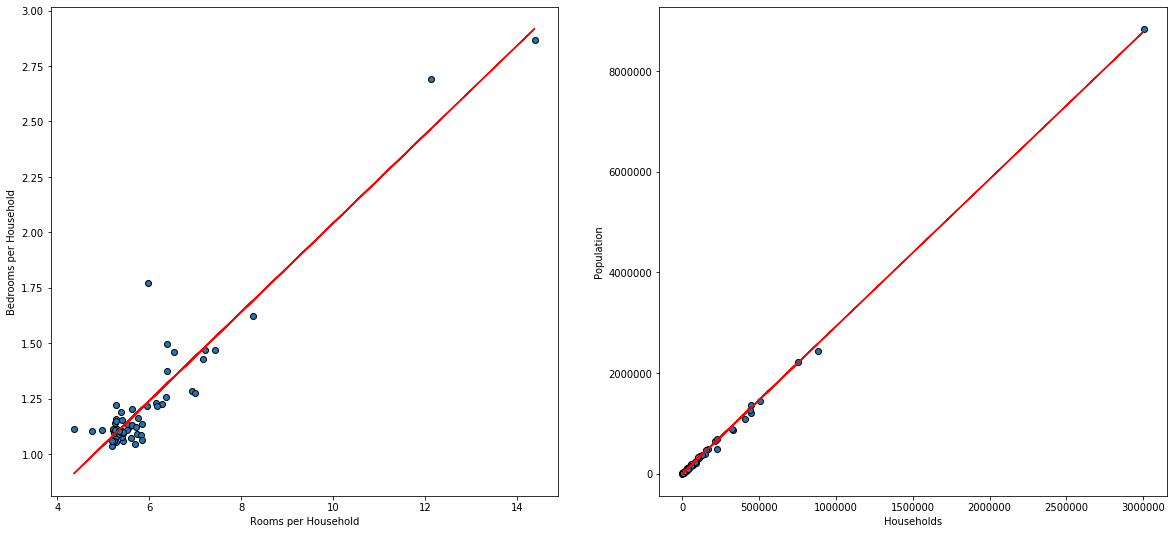

In [7]:
samefig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20,9))

ax1.scatter(county_rooms_per_household, county_bedrooms_per_household, edgecolor='k')
ax1.set_xlabel("Rooms per Household")
ax1.set_ylabel("Bedrooms per Household")

slope1, int1, r1, p1, stderr1 = stats.linregress(county_rooms_per_household, county_bedrooms_per_household)
line1 = slope1 * county_rooms_per_household + int1
ax1.plot(county_rooms_per_household, line1, color='r')


ax2.scatter(county_households, county_population, edgecolor='k')
ax2.set_xlabel("Households")
ax2.set_ylabel("Population")

slope2, int2, r2, p2, stderr2 = stats.linregress(county_households, county_population)
line2 = slope2 * county_households + int1
ax2.plot(county_households, line2, color='r')

plt.savefig("Images/similar_vars.png")

plt.show()


Because of the strong correlation between `Median Income` and `Median House Value`, it is clear that people who have a higher income can afford higher value houses.

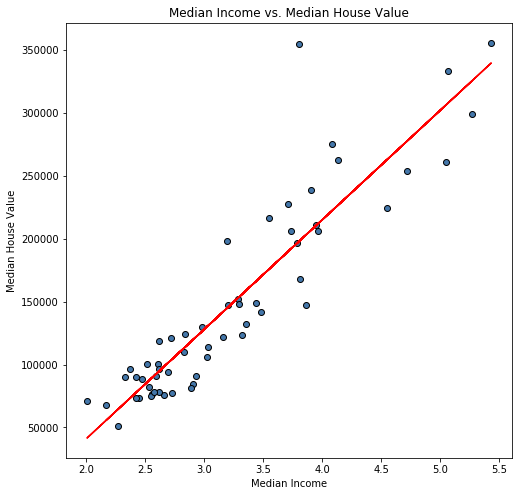

{'slope': 87042.27842318067,
 'intercept': -133153.71779604087,
 'rvalue': 0.9117136775352518,
 'pvalue': 2.6877986092045424e-23,
 'stderr': 5241.262414266992}

In [50]:
labels = ["Median Income", "Median House Value"]
scatter(county_median_income, county_house_value, labels=labels, reg=True)


The outdated technology that could exists in an older house might lead us to believe that house value depreciates with age, but we see that there is a positive correlation between `Median House Age` and `Median House Value`.


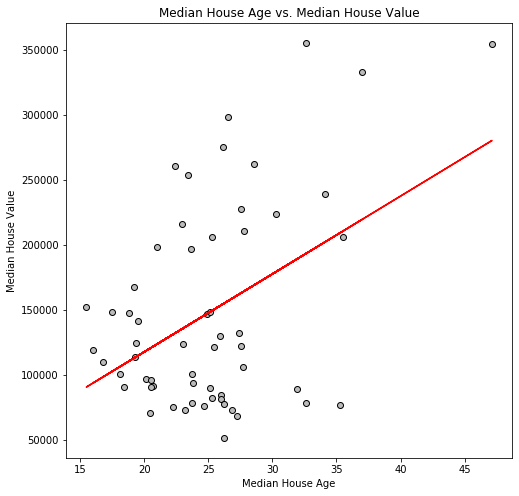

{'slope': 5999.901765708946,
 'intercept': -2410.8889856241003,
 'rvalue': 0.44103472027498575,
 'pvalue': 0.0005298841247121734,
 'stderr': 1631.5747834966355}

In [20]:
labels = ["Median House Age", "Median House Value"]
scatter(county_house_age, county_house_value, labels=labels, reg=True)


There is a notable trend that as `Rooms per Households` increases, `Median House Age` decreses. 

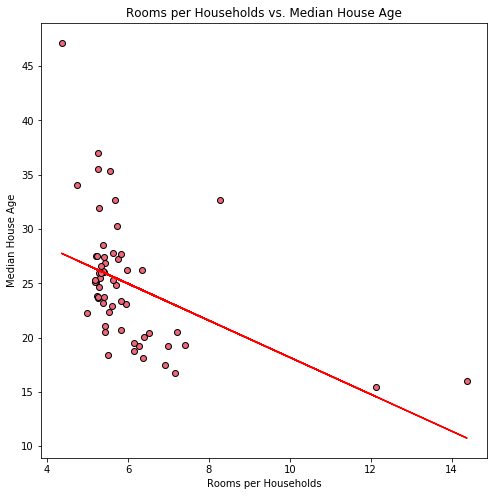

{'slope': -1.6970242750361308,
 'intercept': 35.15071278263972,
 'rvalue': -0.45970179235197356,
 'pvalue': 0.000283151241016393,
 'stderr': 0.4380933674913886}

In [49]:
labels = ["Rooms per Households", "Median House Age"]
scatter(county_rooms_per_household, county_house_age, labels=labels, reg=True)


The data show that there is a negative trend between `Rooms per Household` and `Median House Value` but the data may be skewed due to the fact that Urban areas may have fewer rooms per household, but still have high house values.

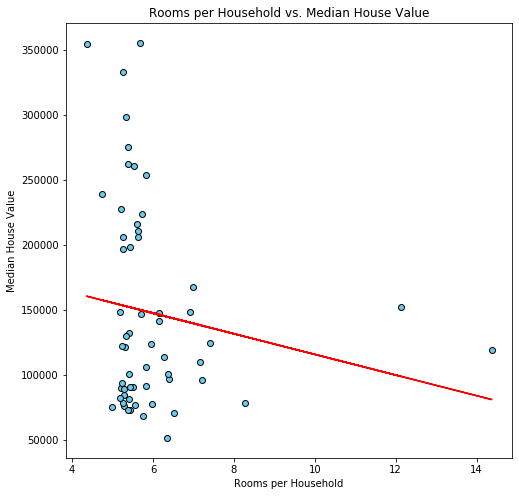

{'slope': -7950.931089888668,
 'intercept': 195131.55118905567,
 'rvalue': -0.1583196322409871,
 'pvalue': 0.2352343490375832,
 'stderr': 6626.390273535202}

In [43]:
labels = ["Rooms per Household", "Median House Value"]
scatter(county_rooms_per_household, county_house_value, labels=labels, reg=True)


Originally we thought that there would a negative correlation between `Crime Rate` and `Median House Value` but the data suggest that there is no meaningful relationship.

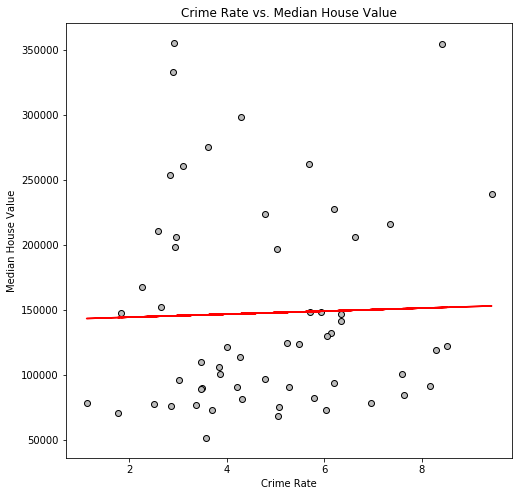

{'slope': 1165.2169578335468,
 'intercept': 141943.4929352029,
 'rvalue': 0.028875569010601097,
 'pvalue': 0.8296367770186361,
 'stderr': 5390.153080791109}

In [22]:
labels = ["Crime Rate", "Median House Value"]
scatter(county_crime_rate, county_house_value, labels=labels, reg=True)


# Conclusion

There are many different factors that contribute to housing values. In our dataset, grouping by county loses the nuances betwen different cities or neighborhoods which leads to some flaws in the analysis.
